# Computer vision - Laboratory

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Convolution
2. Image smoothing
3. Edge detection
4. Applications: Hybrid images and video anonimization

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 Image processing with different scales and filters

a) Read the image "face.png" and analyse its histogram. What is the histogram representing for an image?

- Visualize the R, G, and B channels of the image.

- Visualize the histogram of a color image with the following characteristics:

    - Obtain the histogram with 8, 32, 64 and 256 bins. 

    - Visualize the histogram of each channel and the gray level image and compare them. Comment their difference (see image bellow as an example of histogram extraction).

Note: What type should be the image in order to compute the histogram? Check using different bins for the histogram. 

Hint: the `exposure` module within the `skimage` library makes the histogram extraction easy!

Help: [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_for_notebook/ex21a.png'>

In [1]:
from skimage import exposure #histograms
from scipy import ndimage #convolutions
from skimage import filters #filters
from skimage import feature #features
from skimage import color
from skimage.color import rgba2rgb
import numpy as np # useful for  manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks
%matplotlib inline

ImportError: cannot import name rgba2rgb

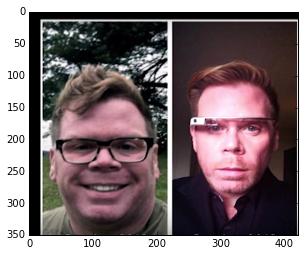

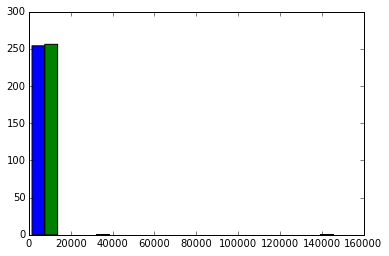

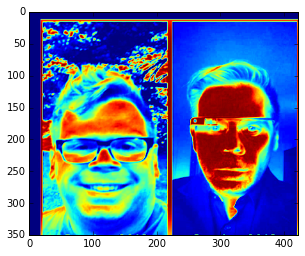

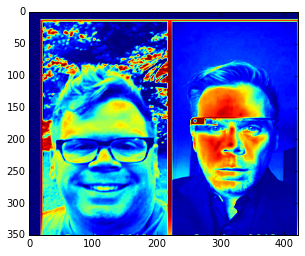

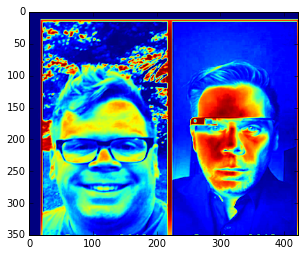

/Users/Jose/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:5616: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 350 x 422)
  'this looks transposed (shape is %d x %d)' % x.shape[::-1])


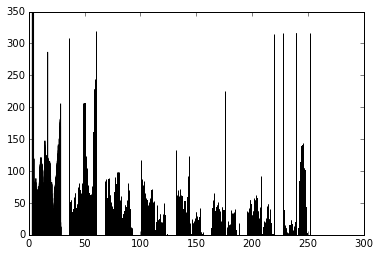

In [2]:
#a)

#bar() function in exposure
face = io.imread('images/face.png')
plt.imshow(face)
plt.show()
plt.hist(exposure.histogram(face))
plt.show()
plt.imshow(face[:,:,0])
plt.show()
plt.show()
plt.show()
plt.imshow(face[:,:,1])
plt.show()
plt.imshow(face[:,:,2])
plt.show()

plt.hist(face[:,:,0], bins=8)
plt.show()

b) Read the image `face.png` and convolve it with a horizontal mask `mask_h1d=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]` after the mask normalization. Afterwards, substract the obtained image to the original one and save the new image. 

***To make your code legible, the resulted images should be shown in a 3x1 plot, with the following titles: a) 'Original image', b) 'Convolved image' and c) 'Difference with the original image'***

Hint: the `convolve` command belongs to the library `ndimage` of `scipy`. 

- Observe and comment how the ***type*** and the ***range of values (max & min)*** changed when different operations have been applied on the image. 

- Plot the different images ((a)original image, (b)intermediate and (c)final) on a figure with multiple images. Put titles on the image plots to explain what each image represents. Is the type of the mask important for the convolution? How is the image changed after the convolution? You need to repeat several times the convolution. Moreover, you need to also use bigger masks in order to observe better the effect of it. Present at least 5 experiments commenting the results obtained and their differences.

Note: Remember that `matplotlib.pyplot` automatically rescales the pixel values of the image before displaying them. Visualize with and without values range rescaling.

Note: The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

In [34]:
face = io.imread('images/face.png')
facergb = color.rgba2rgb(face)
mask = np.array([[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]], dtype= 'float64')
mask = mask/np.shape(mask)[2]
face_convolved = ndimage.convolve(face, mask)
face_diff = face - face_convolved


'# a) b) c) plotting'
fig, ax = plt.subplots()
fig, ax2 = plt.subplots()
fig, ax3 = plt.subplots()
ax.imshow(face)
ax2.imshow(face_convolved)
ax3.imshow(face_diff)
ax.set_title('a)Face Original')
ax.set_xlabel("Properties (max,min), type: (" +str(face.max()) + ", " +str(face.min()) + "), " + str(face.dtype))
ax2.set_title('b)Face Convolved')
ax2.set_xlabel("Properties (max,min), type: (" +str(face_convolved.max()) + ", " +str(face_convolved.min())+ "), " + str(face_convolved.dtype))
ax3.set_title('c)Difference between a-b')
ax3.set_xlabel("Properties (max,min), type: (" +str(face_diff.max()) + ", " +str(face_diff.min())+ "), " + str(face_diff.dtype))



AttributeError: 'module' object has no attribute 'rgba2rgb'

c) Convolve the image with a vertical one-dimensional mask. Compute and visualize the 3 images (a,b,c).

- Extract the image's histograms and visualize them. 

- Compare the results with those of the previous exercise. How does the image change?

d) Convolve the original image with a uniform `two-dimensional` mask of dimensions 15x15 and with all values set to 1. Compute and visualize the 3 images (a,b,c).

- Extract the image's histograms and visualize them. 

- Compare the results with those of the previous exercise.

e) Can we convolve a color image? 

Implement a 3-channel filter, apply it, visualize the 3 images (a, b and c) and comment the results obtained.

Which is the result obtained when applying a single-channel filter channel by channel separately? Visualize again the three images (original, convolved and difference) and compare the results.

Given a color image (im), what is the difference between ***a*** and ***b*** ?
   
*** a) ***

im_2=np.array(im, dtype='float')


*** b) ***

im_2=np.array(im)


im_2=img_as_float(im_2)

f) Change the size of the image a) reducing it 10 times ***and*** b) augmenting it two times. 

Observe if the histogram (i.e. nbins = 32) of the new images changed, and comment what happens and why. 

Apply the convolution on the three images with the same two dimensional uniform mask and comment the results.
Note: Observe what is the output of the command `resize`.


### 2.2 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the original image of the previous exercise:

- Gaussian kernel with sigma = 1
- Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
- Median filter.

Comment the effect of using different kinds of filters on the original image.

Hint: use the skimage.filters function for creating the different filters.

**(Optional)** Apply the smoothing on some other images and present their results.

### 2.3 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

Apply different contour extraction tecniques introduced during the theory session (prewitt, sobel and canny). Find the optimal parameteres for each of them.

Use subplot and title to visualize the results.

Which is the best countour detection technique? 

Which are the optimal parameters for this image? 

Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

Hint: you can use skimage.feature.canny for applying the canny filter

Optional: Superimpose the contours over the image.

b)	Repeate the experiment with other images, if you want you can use the ones included in the folder **images**. Comment if the parameters need to be changed for the different images.

- Are the contours improved if the image is previously smoothed ? 
- Which are the limitations of the different images contour extraction?

d) Optional: How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


### 2.4 Applying smoothing in order to obtain hybrid images

a) Given `Einstein.jpg` and `monroe.jpg` images, compute the hybrid image and visualize it (consult the theory slides for hybrid image definition).

Hint: In order to highlight the effect, in the low frequency image you should define a lower sigma, while for the high frequency image you should use a higher one. 

b) Combine both hybrid images and visualize them. Analyze which is the best way of showing it if our aim is to see Marylin Monroe. Additionally, rescale the image to different size and comment the results. Present the different visualizations of the experiment performed.

Optional : compute hybrid images from other images. Apply it over color images.

## 2.5 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collection bigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with %matplotlib inline visualizing in the same notebook the images. You should use the matplotlib nbagg plugin to visualize the sequence of images in a different window. To this purpose, write before animation the following line:

% matplotlib nbagg



**Delivery**

Compressed file P2_Student1_Student2.zip that includes:

   - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
   - The images used that are not provided in P2.zip.

**Deadline** (Campus Virtual): October 17, 11:00 p.m.
